<h6><center>Nour Mhiri   &   Ilyes Rezgui & Nada Morghom</h6>
<h3 align=center><font size = 5>Niveau:L3CS</font></h3>
<h3 align=center><font size = 5>Module: Machine Learning</font></h3>
<h3 align=center><font size = 5>Mini-Projet: Arbre de Décision </font></h3>

<hr></hr>

In [ ]:
import pandas as pd

data = {'Att1': ['E','E','Neg','Pas','Pas','Pas','Neg','E','E','Pas','E','Neg','Neg','Pas'],
'Att2': ['>40', '>40','>40','<30 et >20','<20 et >10','<20 et >10','<20 et >10','<30 et >20','<20 et >10','<30 et >20','<30 et >20','<30 et >20','>40','<30 et >20'],
'Att3':['Trop','Trop','Trop','Trop','Normale','Normale','Normale','Trop','Normale','Normale','Normale','Trop','Normale','Trop'],
'Att4':['1','0','1','1','1','0','0','1','1','1','0','0','1','0'],
'Class':['Non','Non','Oui','Oui','Oui','Non','Oui','Non','Oui','Oui','Oui','Oui','Oui','Non'],
}

df = pd.DataFrame.from_dict(data)
df.head(20)

,Att1,Att2,Att3,Att4,Class
0,E,>40,Trop,1,Non
1,E,>40,Trop,0,Non
2,Neg,>40,Trop,1,Oui
3,Pas,<30 et >20,Trop,1,Oui
4,Pas,<20 et >10,Normale,1,Oui
5,Pas,<20 et >10,Normale,0,Non
6,Neg,<20 et >10,Normale,0,Oui
7,E,<30 et >20,Trop,1,Non
8,E,<20 et >10,Normale,1,Oui
9,Pas,<30 et >20,Normale,1,Oui


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
att1_encode = le.fit_transform(df["Att1"])

In [ ]:
att1_encode = pd.DataFrame(data = att1_encode, columns=["Att1_Enc"], index=df.index)

In [ ]:
att2_encode = le.fit_transform(df["Att2"])
att3_encode = le.fit_transform(df["Att3"])
att4_encode = le.fit_transform(df["Att4"])
att2_encode = pd.DataFrame(data = att2_encode, columns=["Att2_Enc"], index=df.index)
att3_encode = pd.DataFrame(data = att3_encode, columns=["Att3_Enc"], index=df.index)
att4_encode = pd.DataFrame(data = att4_encode, columns=["Att4_Enc"], index=df.index)

In [ ]:
df_encode = pd.concat([att1_encode, att2_encode, att3_encode,att4_encode,pd.DataFrame(df["Class"]) ] , axis = 1)
df_encode

,Att1_Enc,Att2_Enc,Att3_Enc,Att4_Enc,Class
0,0,2,1,1,Non
1,0,2,1,0,Non
2,1,2,1,1,Oui
3,2,1,1,1,Oui
4,2,0,0,1,Oui
5,2,0,0,0,Non
6,1,0,0,0,Oui
7,0,1,1,1,Non
8,0,0,0,1,Oui
9,2,1,0,1,Oui


In [ ]:
X = df_encode.iloc[:,:4]
X

,Att1_Enc,Att2_Enc,Att3_Enc,Att4_Enc
0,0,2,1,1
1,0,2,1,0
2,1,2,1,1
3,2,1,1,1
4,2,0,0,1
5,2,0,0,0
6,1,0,0,0
7,0,1,1,1
8,0,0,0,1
9,2,1,0,1


In [ ]:
y = df_encode["Class"]
y

0     Non
1     Non
2     Oui
3     Oui
4     Oui
5     Non
6     Oui
7     Non
8     Oui
9     Oui
10    Oui
11    Oui
12    Oui
13    Non
Name: Class, dtype: object

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

import numpy as np

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

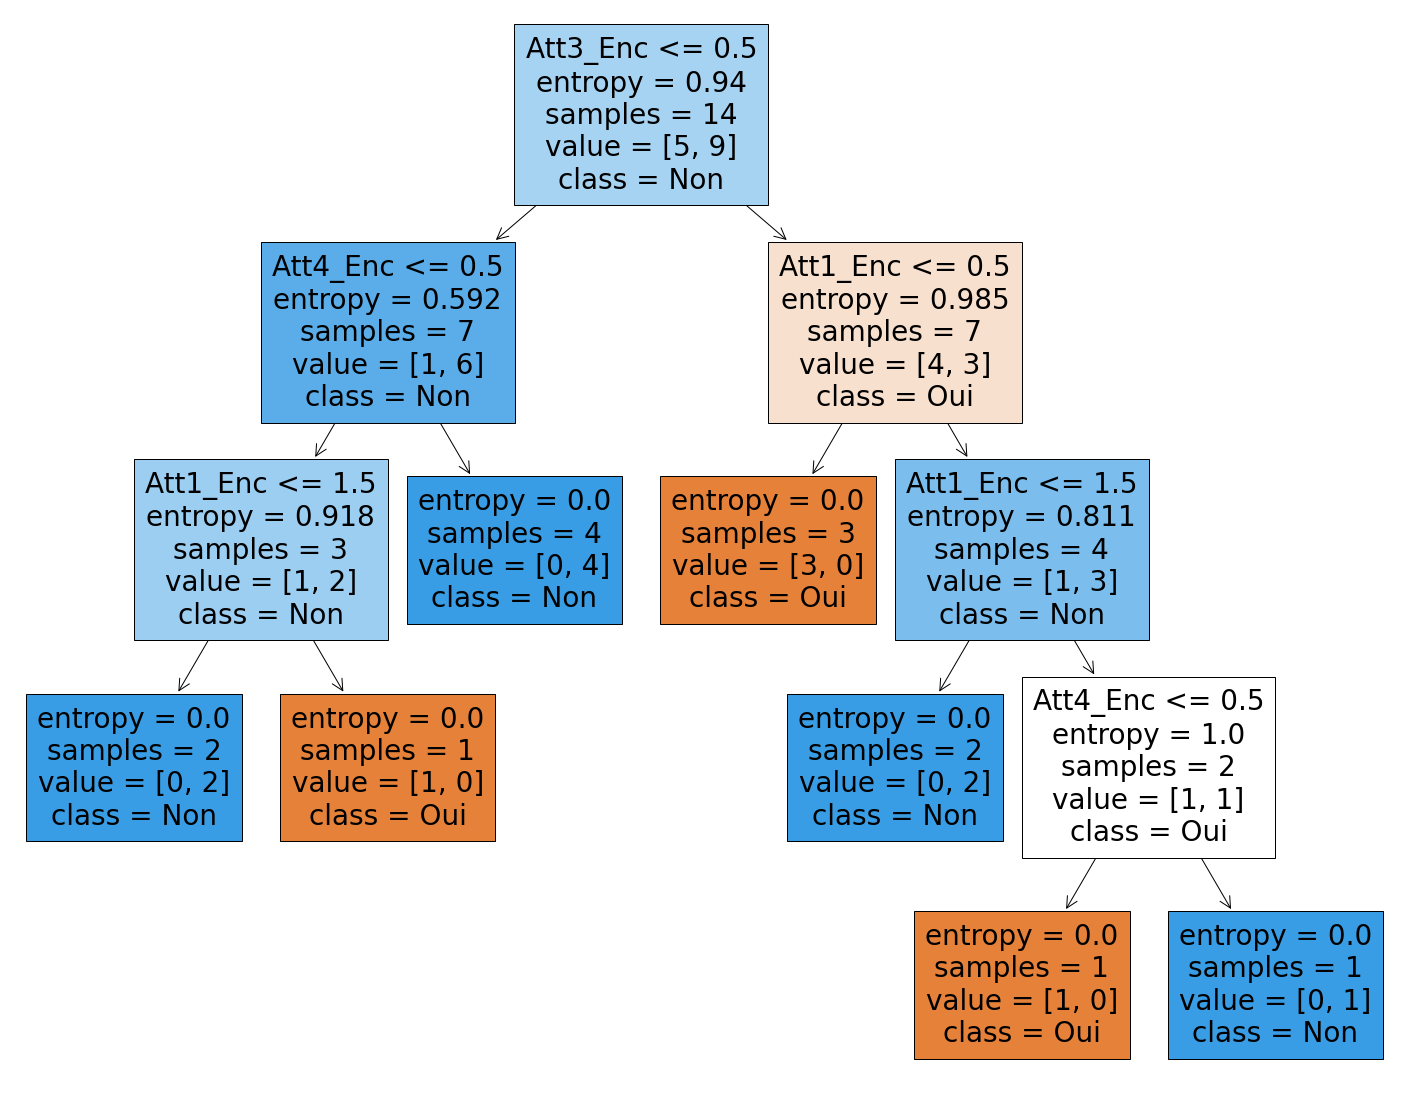

In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline
import matplotlib.pyplot as plt
# on trace notre arbre
plt.figure(figsize=(25, 20))
plot_tree(clf, feature_names=X.columns, class_names=["Oui","Non"], filled=True);

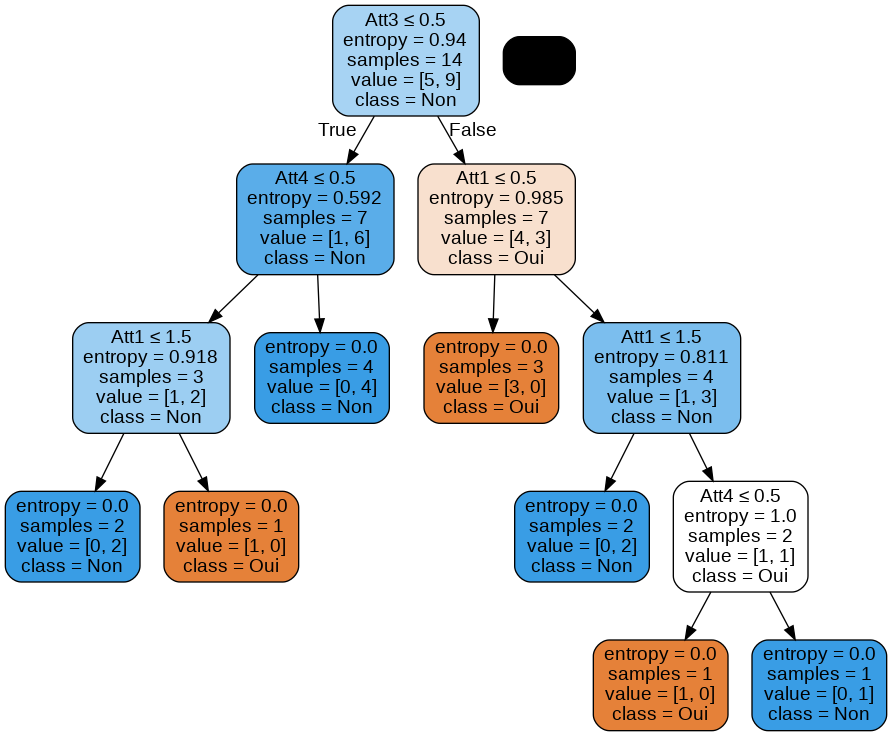

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ["Att1","Att2","Att3","Att4"],class_names=['Oui','Non'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Class.png')
Image(graph.create_png())

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

import numpy as np

clf1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=0)
clf1.fit(X, y)

DecisionTreeClassifier(max_depth=20, random_state=0)

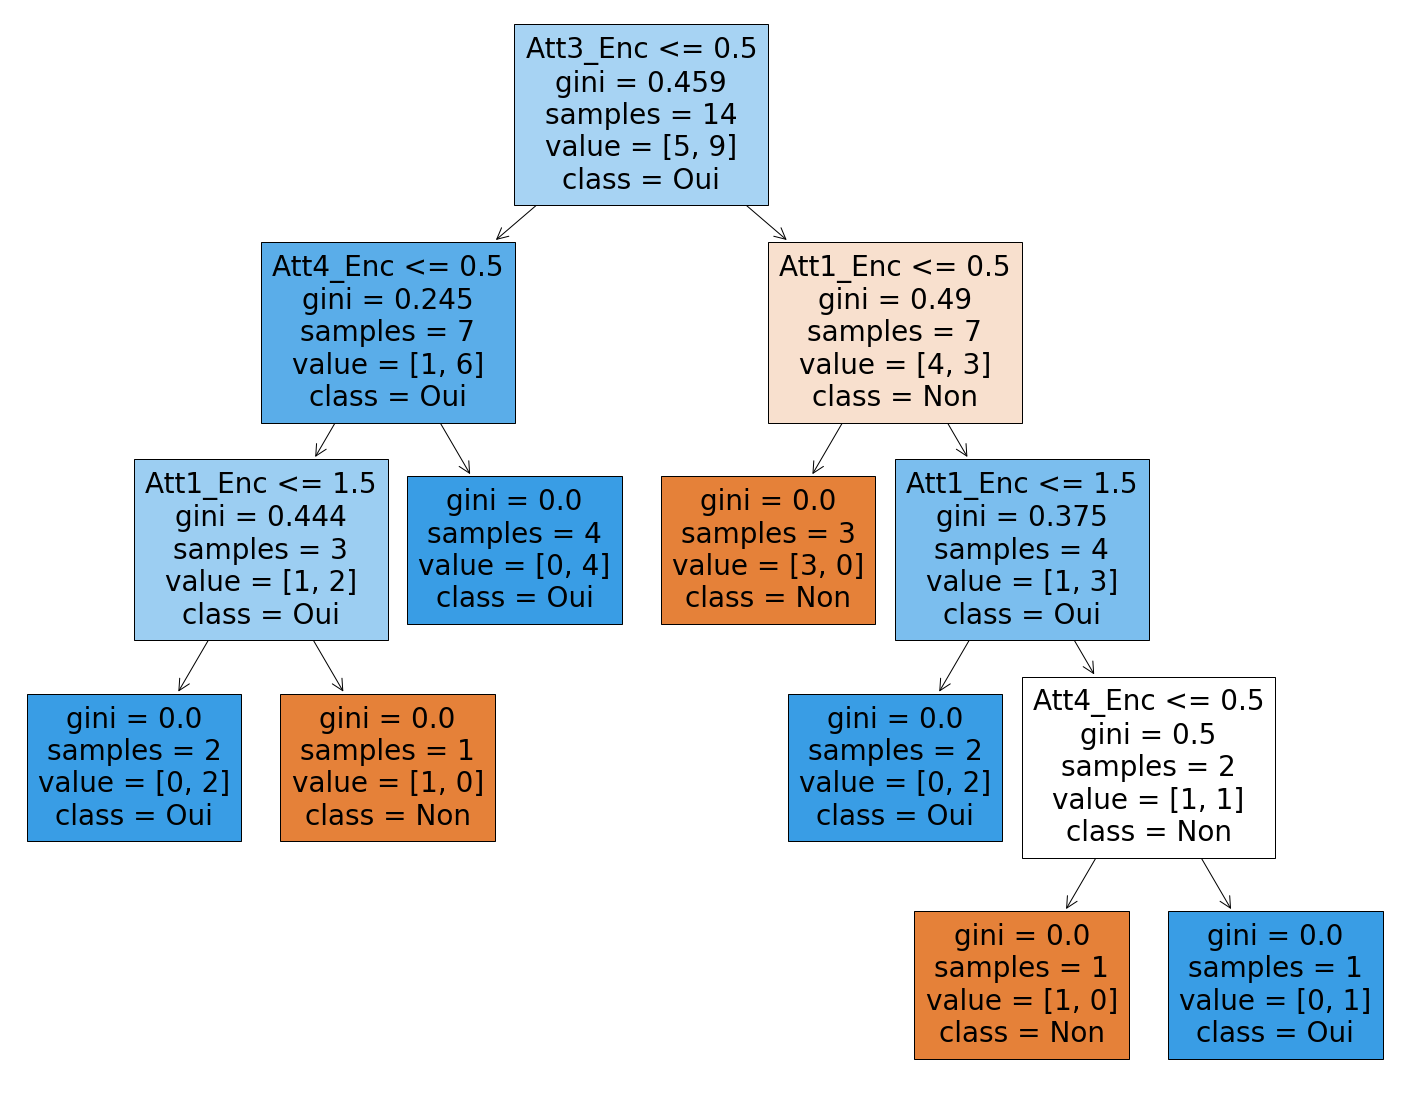

In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline
import matplotlib.pyplot as plt
# on trace notre arbre
plt.figure(figsize=(25, 20))
plot_tree(clf1, feature_names=X.columns, class_names=["Non","Oui"], filled=True);

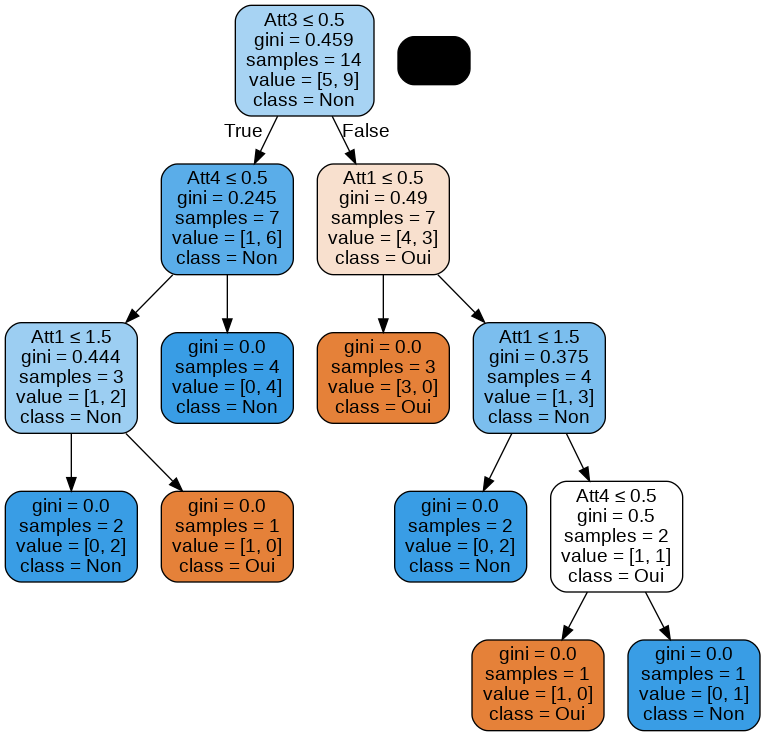

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ["Att1","Att2","Att3","Att4"],class_names=['Oui','Non'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Class.png')
Image(graph.create_png())